In [1]:
data_path = 'mnist'
k = 10

In [2]:
import kmeans as kmeans_

kmeans = kmeans_.load_kmeans('kmeans-20.dat')

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy

import bmm
import visualize

In [4]:
# loading the data
from mnist import load_mnist

train_data, train_labels = load_mnist(dataset='training', path=data_path)

# pre-processing the data (reshape + making it binary)

train_data = np.reshape(train_data, (60000, 784))
train_data_binary = np.where(train_data > 0.5, 1, 0)

# Gaussian Mixture Models

In [14]:
import sklearn.decomposition

d = 40

reducer = sklearn.decomposition.PCA(n_components=d)
reducer.fit(train_data)

train_data_reduced = reducer.transform(train_data)
test_data_reduced = reducer.transform(test_data)
kmeans_reduced = reducer.transform(kmeans)

In [15]:
import gmm

k = 20

model = gmm.gmm(k, verbose=True)
model.fit(train_data_reduced, means_init_heuristic='kmeans', means=kmeans_reduced)

using kmeans heuristic to initialize the means
initializing covars
[00] likelihood = -48.14527308243213 (elapsed 0:00:00.000024)
[01] likelihood = -45.06296249786608 (elapsed 0:00:00.288438)
[02] likelihood = -44.776319038156515 (elapsed 0:00:00.619868)
[03] likelihood = -44.72715272282866 (elapsed 0:00:00.918159)
[04] likelihood = -44.70893252620453 (elapsed 0:00:01.164549)
[05] likelihood = -44.698126124193905 (elapsed 0:00:01.405008)
[06] likelihood = -44.690411041386525 (elapsed 0:00:01.689520)
[07] likelihood = -44.68418697359688 (elapsed 0:00:01.941023)
[08] likelihood = -44.67918190960741 (elapsed 0:00:02.169632)
[09] likelihood = -44.674894754989495 (elapsed 0:00:02.373193)
[10] likelihood = -44.67102563613299 (elapsed 0:00:02.598962)
[11] likelihood = -44.66744938088715 (elapsed 0:00:02.868473)
[12] likelihood = -44.66416100176178 (elapsed 0:00:03.152530)
[13] likelihood = -44.66111778127396 (elapsed 0:00:03.424146)
[14] likelihood = -44.65822098011407 (elapsed 0:00:03.653982)

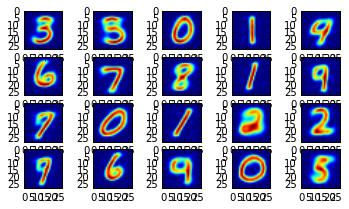

In [16]:
means_projected = reducer.inverse_transform(model.means)
visualize.plot_means(means_projected)

### Classification using a GMM with a diagonal covariance matrix

In [17]:
bayesian_classifier = classifier.classifier(k, model_type='gmm',
                                            means_init_heuristic='kmeans',
                                            means=kmeans_reduced,
                                            covariance_type='diag')
bayesian_classifier.fit(train_data_reduced, train_labels)

training label 0 (5923 samples)
converged in 65 iterations in 0:00:01.213738
training label 1 (6742 samples)
converged in 74 iterations in 0:00:01.788544
training label 2 (5958 samples)
converged in 37 iterations in 0:00:00.952608
training label 3 (6131 samples)
converged in 26 iterations in 0:00:00.585228
training label 4 (5842 samples)
converged in 40 iterations in 0:00:00.841749
training label 5 (5421 samples)
converged in 66 iterations in 0:00:01.227099
training label 6 (5918 samples)
converged in 34 iterations in 0:00:00.806983
training label 7 (6265 samples)
converged in 48 iterations in 0:00:01.382043
training label 8 (5851 samples)
converged in 39 iterations in 0:00:00.866910
training label 9 (5949 samples)
converged in 68 iterations in 0:00:01.304171


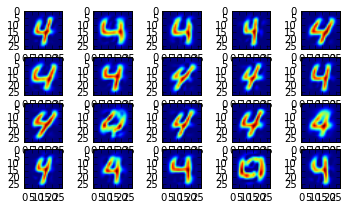

In [18]:
means_projected = reducer.inverse_transform(bayesian_classifier.models[4].means)
visualize.plot_means(means_projected)

In [19]:
predicted_labels = bayesian_classifier.predict(test_data_reduced, label_set)

print('accuracy: {}'.format(np.mean(predicted_labels == test_labels)))

accuracy: 0.9474


### Classification using a GMM with a full covariance matrix

In [20]:
bayesian_classifier = classifier.classifier(k, model_type='gmm',
                                            means_init_heuristic='kmeans',
                                            means=kmeans_reduced,
                                            covariance_type='full')
bayesian_classifier.fit(train_data_reduced, train_labels)

training label 0 (5923 samples)
converged in 40 iterations in 0:00:07.932541
training label 1 (6742 samples)
converged in 35 iterations in 0:00:06.455700
training label 2 (5958 samples)
converged in 101 iterations in 0:00:20.237102
training label 3 (6131 samples)
converged in 87 iterations in 0:00:17.337337
training label 4 (5842 samples)
converged in 45 iterations in 0:00:08.870159
training label 5 (5421 samples)
converged in 66 iterations in 0:00:10.676941
training label 6 (5918 samples)
converged in 31 iterations in 0:00:05.561576
training label 7 (6265 samples)
converged in 58 iterations in 0:00:10.070746
training label 8 (5851 samples)
converged in 79 iterations in 0:00:12.722273
training label 9 (5949 samples)
converged in 38 iterations in 0:00:06.375860


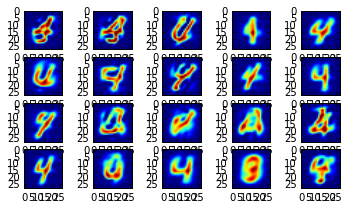

In [21]:
means_projected = reducer.inverse_transform(bayesian_classifier.models[4].means)
visualize.plot_means(means_projected)

In [22]:
predicted_labels = bayesian_classifier.predict(test_data_reduced, label_set)

print('accuracy: {}'.format(np.mean(predicted_labels == test_labels)))

accuracy: 0.9685
